In [82]:
!pip install geopandas
!pip install folium
import pandas as pd
import numpy as np
import random
import os
from tqdm.notebook import tqdm
import geopandas as gpd
from shapely.geometry import Point
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [83]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [84]:
from sklearn.metrics import mean_squared_error
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_rows = None

In [85]:
data=pd.read_csv("C:\\Users\\dsand\\Downloads\\climate_nasa.csv")

In [86]:
data.head()

date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...        3.00000   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...       26.00000   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not harm the Eart...

In [87]:
data.shape

(522, 5)

In [88]:
data.isna().sum()

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

In [89]:
data.drop(['profileName','commentsCount'],axis=1,inplace=True)

In [90]:
data.head()

date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not harm the Eart...

In [91]:
data.text

0      Neat comparison I have not heard it before.\n ...
1      An excellent way to visualise the invisible! T...
2      Does the CO2/ghg in the troposphere affect the...
3      excellent post! I defo feel the difference - o...
4      Yes, and carbon dioxide does not harm the Eart...
5      Excellent example...very relatable to the Gen ...
6      I am so proud of whoever created this content....
7      Has the Earth ever had a concentration of over...
8      Yes, and not even half a cup later that poor s...
9      Historical co2 data would make it an interesti...
10     why the northern hemisphere warm more than the...
11                     So what are we gonna do about it?
12     Yes. I fall asleep on decaf and stay awake wit...
13     Plus you can literally measure the heat retent...
14     The two most abundant gases (nitrogen and oxyg...
15        That's an excellent way to illustrate 400 ppm.
16     I find it interesting when people claim that C...
17                      Love th

In [92]:
data["text"].unique()

array(['Neat comparison I have not heard it before.\n I would say that CO2 is like a disco ball so energy and collide with countless molecules as it bounces around in our atmosphere.',
       'An excellent way to visualise the invisible! Thanks',
       'Does the CO2/ghg in the troposphere affect the stratosphere? Being warmer the troposphere must be expanding?',
       'excellent post! I defo feel the difference - one i can drink and the other makes me feel sick.',
       'Yes, and carbon dioxide does not harm the Earth like you people are making it out to be. Fake climate change rhetoric, as usual.',
       'Excellent example...very relatable to the Gen Pop. Complex topics...explained in understandable ways. 👍⚡',
       'I am so proud of whoever created this content. Please feel very very good about yourself today',
       'Has the Earth ever had a concentration of over 1000 ppm?',
       'Yes, and not even half a cup later that poor soul is gonna know it too.',
       'Historical co

In [93]:
data.text.value_counts()

text
The “greenhouse effect” is concerned with the infrared radiation given off by the earth. The sun’s radiation basically passes through the oxygen and nitrogen in the earth’s atmosphere and lands on the earth’s surface, where 70% of it is absorbed; 30% is reflected back into the atmosphere. Part of this radiation bounces off the greenhouse gases and returns to be absorbed by earth. The greenhouses gases (GHGs) are water vapor (H2O), carbon dioxide (CO2), nitrous oxide (NO2) and methane (CH4).\n\nHow long does CO2 remain in the atmosphere? This is a difficult question because there are several processes that remove carbon dioxide from the atmosphere. From 65% to 80% of the CO2 that is released into the air dissolves into the ocean over a period of 50-200 years. The rest is removed over several hundred thousand years. According to the IPCC Fourth Assessment Report, about 50% of CO2 increase will be removed from the atmosphere within 30 years, another 30% will be removed within a few c

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        522 non-null    object
 1   likesCount  522 non-null    int64 
 2   text        504 non-null    object
dtypes: int64(1), object(2)
memory usage: 12.4+ KB


In [95]:
def preprocess(text):
    if pd.isnull(text):  # Handle NaN values safely
        return ""
    
    text = str(text).lower()  # Convert to string and lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [96]:
data['cleaned_text'] = data['text'].apply(preprocess)


In [97]:
data['cleaned_text']

0      neat comparison heard would say co like disco ...
1               excellent way visualise invisible thanks
2      coghg troposphere affect stratosphere warmer t...
3      excellent post defo feel difference one drink ...
4      yes carbon dioxide harm earth like people maki...
5      excellent examplevery relatable gen pop comple...
6      proud whoever created content please feel good...
7                           earth ever concentration ppm
8           yes even half cup later poor soul gonna know
9         historical co data would make interesting post
10          northern hemisphere warm southern hemisphere
11                                                 gonna
12     yes fall asleep decaf stay awake real coffee k...
13     plus literally measure heat retention effect c...
14     two abundant gases nitrogen oxygen comprise at...
15                    thats excellent way illustrate ppm
16     find interesting people claim co cant possibly...
17                             

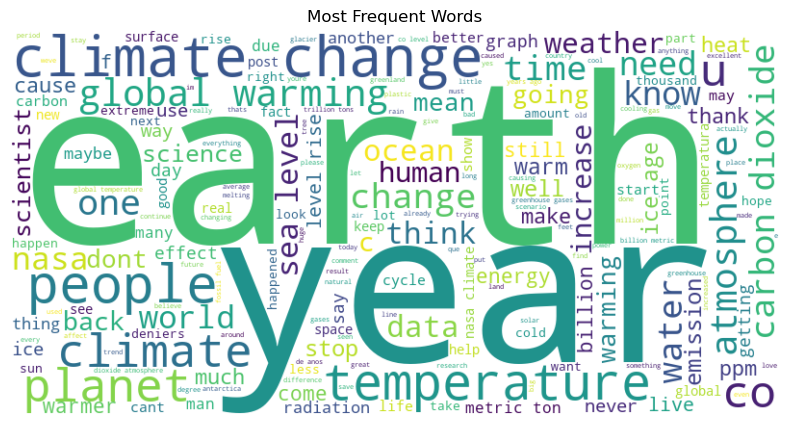

In [98]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into one string
text = " ".join(data['cleaned_text'])

# Generate and show the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words")
plt.show()


In [99]:
from textblob import TextBlob

data['sentiment'] = data['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [100]:
data["sentiment"]

0      0.00000
1      0.60000
2      0.00000
3      0.14286
4     -0.37500
5      0.35000
6      0.75000
7      0.00000
8     -0.18889
9      0.25000
10     0.30000
11     0.00000
12     0.20000
13     0.00000
14     0.08892
15     1.00000
16     0.23333
17     0.65000
18     0.00000
19     0.00000
20    -0.01000
21     0.80000
22     0.20000
23     1.00000
24     0.70000
25     0.00000
26     0.00000
27     0.00000
28     0.00000
29     0.10000
30    -0.15000
31     0.30000
32     0.60000
33    -0.12500
34     0.00167
35     0.50000
36    -0.04375
37     0.00000
38     0.00000
39     0.00000
40     0.00000
41     0.50000
42     0.06000
43     0.00000
44     0.00000
45     0.05413
46     0.00000
47     0.20000
48     0.00000
49     0.10000
50     0.00000
51     0.00648
52     0.10000
53     1.00000
54     0.17455
55     0.00000
56    -0.06667
57     0.40000
58     0.25000
59     0.27500
60     0.00000
61     0.00000
62     0.28571
63     0.06667
64     0.00000
65     0.00000
66     0.0

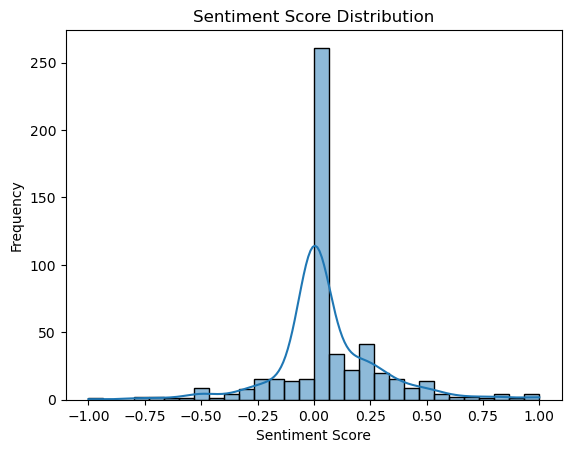

In [101]:
import seaborn as sns

sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()


In [103]:
data.head()

date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                                text  \
0  Neat comparison I have not heard it before.\n ...   
1  An excellent way to visualise the invisible! T...   
2  Does the CO2/ghg in the troposphere affect the...   
3  excellent post! I defo feel the difference - o...   
4  Yes, and carbon dioxide does not harm the Eart...   

                                        cleaned_text  sentiment  
0  neat comparison heard would say co like disco ...    0.00000  
1           excellent way visualise invisible thanks    0.60000  
2  coghg troposphere affect stratosphere warmer t...    0.00000  
3  excellent post defo feel difference one drink ...    0.14286  
4  yes carbon dioxide harm earth like people maki...   -0.37500

In [104]:
data.head()

date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                                text  \
0  Neat comparison I have not heard it before.\n ...   
1  An excellent way to visualise the invisible! T...   
2  Does the CO2/ghg in the troposphere affect the...   
3  excellent post! I defo feel the difference - o...   
4  Yes, and carbon dioxide does not harm the Eart...   

                                        cleaned_text  sentiment  
0  neat comparison heard would say co like disco ...    0.00000  
1           excellent way visualise invisible thanks    0.60000  
2  coghg troposphere affect stratosphere warmer t...    0.00000  
3  excellent post defo feel difference one drink ...    0.14286  
4  yes carbon dioxide harm earth like people maki...   -0.37500

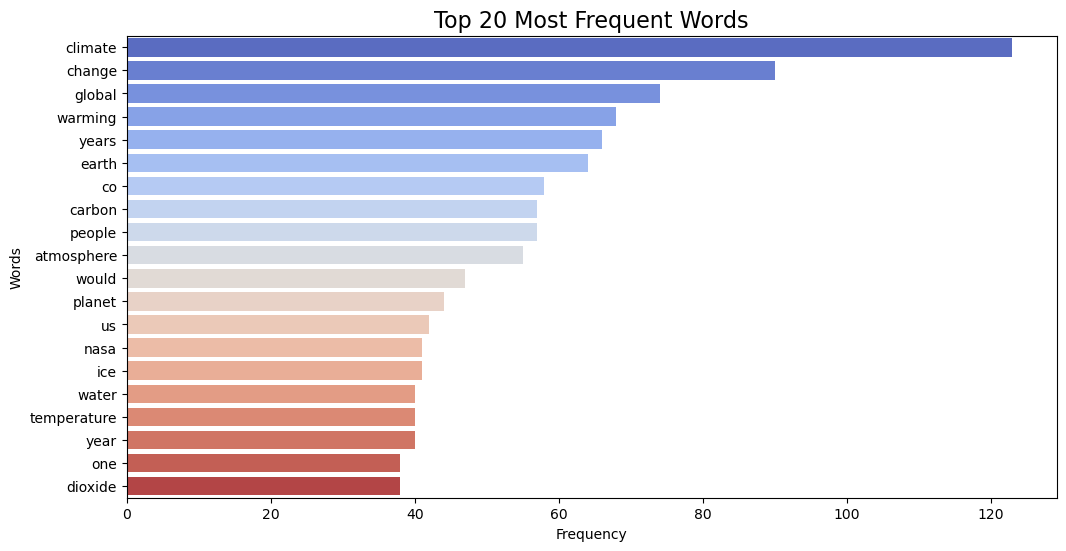

In [105]:
from collections import Counter
import seaborn as sns

words = " ".join(data['cleaned_text']).split()
word_freq = Counter(words).most_common(20)

words, counts = zip(*word_freq)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette='coolwarm')
plt.title("Top 20 Most Frequent Words", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [106]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(data['cleaned_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

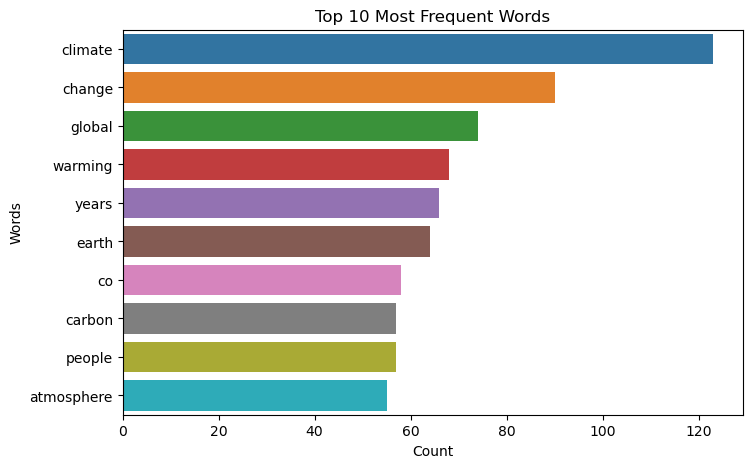

In [107]:
from collections import Counter

# Tokenize and count words
all_words = " ".join(data['cleaned_text']).split()
common_words = Counter(all_words).most_common(10)

# Separate words and counts for plotting
words, counts = zip(*common_words)

plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 10 Most Frequent Words")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()


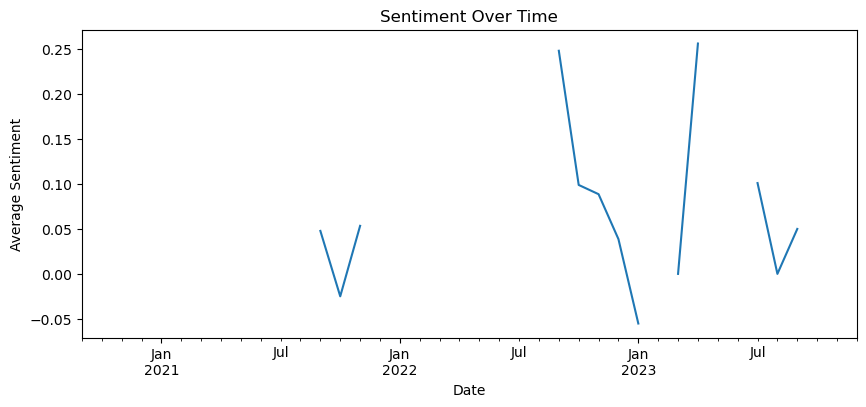

In [108]:
data['date'] = pd.to_datetime(data['date'])  # make sure it's datetime
data.set_index('date', inplace=True)

# Resample and plot sentiment over time
data['sentiment'].resample('M').mean().plot(figsize=(10, 4))
plt.title("Sentiment Over Time")
plt.ylabel("Average Sentiment")
plt.xlabel("Date")
plt.show()


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 522 entries, 2022-09-07 17:12:32+00:00 to 2022-12-22 17:00:08+00:00
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   likesCount    522 non-null    int64  
 1   text          504 non-null    object 
 2   cleaned_text  522 non-null    object 
 3   sentiment     522 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 20.4+ KB


In [110]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['cleaned_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Show top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"\nTopic {i+1}:")
    print(" ".join([words[i] for i in topic.argsort()[-10:]]))



Topic 1:
level ice sea water feet dioxide global carbon atmosphere warming

Topic 2:
thank sun know nasa years year earth global change climate

Topic 3:
temperature start warming energy global years earth people change climate

Topic 4:
world save earth data years human planet change people climate

Topic 5:
ppm time carbon earth nasa earths heat think change climate


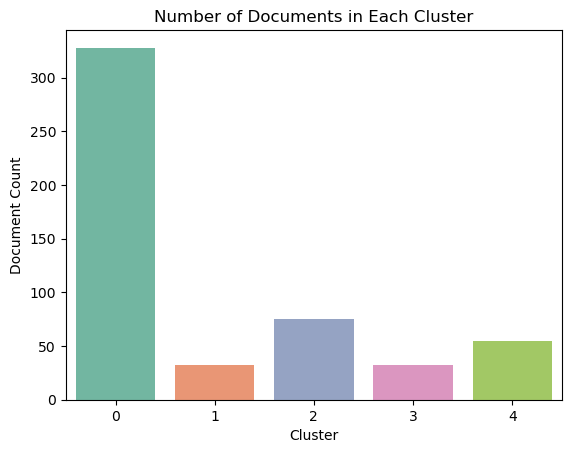

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

tfidf = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = tfidf.fit_transform(data['cleaned_text'])

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

data['cluster'] = kmeans.labels_

sns.countplot(x='cluster', data=data, palette='Set2')
plt.title("Number of Documents in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Document Count")
plt.show()


In [112]:
data.cluster.value_counts()

cluster
0    328
2     75
4     55
3     32
1     32
Name: count, dtype: int64

In [113]:
data[data["cluster"]==0]

likesCount  \
date                                    
2022-09-07 17:12:32+00:00           2   
2022-09-08 14:51:13+00:00           0   
2022-09-07 17:19:41+00:00           1   
2022-09-08 00:51:30+00:00           4   
2022-09-15 17:10:57+00:00           4   
2022-09-07 17:31:25+00:00          10   
2022-09-07 18:07:53+00:00           1   
2022-09-07 22:45:56+00:00           0   
2022-09-07 16:30:55+00:00           4   
2022-09-07 16:13:39+00:00           6   
2022-09-07 17:10:34+00:00           1   
2022-09-07 16:48:17+00:00           3   
2022-09-07 16:29:02+00:00          18   
2022-09-07 22:24:21+00:00           3   
2022-09-07 17:30:50+00:00          14   
2022-09-07 17:15:55+00:00           1   
2022-09-07 17:26:16+00:00           0   
2022-09-07 16:25:32+00:00           0   
2022-10-08 11:58:59+00:00           0   
2022-09-07 16:05:17+00:00           0   
2022-09-07 16:25:20+00:00           0   
2022-09-15 16:05:08+00:00           0   
2022-09-08 21:32:25+00:00           0   
2022-09-10 14:03:08+00:00           1   
2022-09-10 21:41:15+00:00           0   
2023-08-13 18:38:05+00:00           0   
2022-09-07 17:05:34+00:00           0   
2022-11-30 10:18:53+00:00           4   
2022-11-30 10:13:48+00:00           1   
2022-11-29 18:29:22+00:00           3   
2022-11-29 20:25:36+00:00           1   
2022-11-29 18:39:45+00:00           5   
2022-11-29 18:28:44+00:00           3   
2022-11-29 18:30:13+00:00           0   
2023-12-02 16:41:56+00:00           1   
2022-12-05 13:56:09+00:00           0   
2022-11-30 02:38:06+00:00           0   
2022-11-30 04:56:29+00:00           0   
2023-07-13 16:46:20+00:00          19   
2023-07-07 17:45:13+00:00           2   
2023-07-26 17:43:08+00:00           0   
2023-07-08 00:05:17+00:00           1   
2023-07-10 20:00:56+00:00           2   
2023-09-01 16:10:07+00:00           1   
2023-07-08 14:48:49+00:00           2   
2023-07-19 07:30:21+00:00           2   
2023-07-13 16:33:35+00:00           5   
2023-07-07 21:27:29+00:00           4   
2023-07-10 15:18:43+00:00           2   
2023-07-11 01:44:32+00:00           2   
2023-07-08 21:01:39+00:00           1   
2023-07-07 16:37:57+00:00           0   
2023-07-13 22:50:26+00:00           1   
2023-07-07 22:54:55+00:00           0   
2023-07-12 02:46:45+00:00           0   
2023-09-15 11:35:56+00:00           0   
2023-07-11 20:20:23+00:00           0   
2023-07-09 18:37:53+00:00           1   
2023-07-07 15:57:35+00:00           1   
2023-07-29 20:56:19+00:00           0   
2023-07-26 18:18:19+00:00           0   
2023-07-26 18:17:45+00:00           0   
2021-09-23 12:55:54+00:00          33   
2021-09-23 07:53:27+00:00          10   
2021-09-22 23:33:48+00:00           9   
2021-09-23 19:46:23+00:00           1   
2021-09-27 15:22:05+00:00           0   
2021-09-23 19:01:20+00:00           0   
2021-09-23 17:34:40+00:00           0   
2021-10-04 14:52:50+00:00           0   
2021-09-24 20:40:54+00:00           1   
2021-09-24 02:44:02+00:00           0   
2021-09-23 20:22:47+00:00           1   
2021-09-23 19:50:48+00:00           0   
2021-09-23 19:32:26+00:00           1   
2021-09-23 19:19:59+00:00           0   
2021-09-23 17:41:49+00:00           5   
2021-09-23 16:23:44+00:00           6   
2021-09-23 16:03:59+00:00           0   
2021-09-23 15:15:01+00:00           0   
2021-09-23 13:52:56+00:00           3   
2021-09-23 13:29:17+00:00           0   
2021-09-23 13:22:46+00:00           0   
2021-09-23 10:51:55+00:00           3   
2021-09-23 06:16:50+00:00           0   
2021-09-23 04:00:16+00:00           0   
2021-09-23 01:59:05+00:00           1   
2021-09-23 01:56:21+00:00           0   
2021-09-23 01:14:47+00:00          22   
2021-09-22 23:09:53+00:00           3   
2021-09-22 22:45:02+00:00           6   
2021-09-22 20:23:40+00:00           4   
2020-09-16 16:04:37+00:00           1   
2020-09-17 14:36:44+00:00           0   
2020-09-17 14:28:06+00:00           0   
2020-09-17 04:33:45+00:00           0   
2020-09-1

In [114]:
data.head()

likesCount  \
date                                    
2022-09-07 17:12:32+00:00           2   
2022-09-08 14:51:13+00:00           0   
2022-09-07 17:19:41+00:00           1   
2022-09-08 00:51:30+00:00           4   
2022-09-07 19:06:20+00:00          16   

                                                                        text  \
date                                                                           
2022-09-07 17:12:32+00:00  Neat comparison I have not heard it before.\n ...   
2022-09-08 14:51:13+00:00  An excellent way to visualise the invisible! T...   
2022-09-07 17:19:41+00:00  Does the CO2/ghg in the troposphere affect the...   
2022-09-08 00:51:30+00:00  excellent post! I defo feel the difference - o...   
2022-09-07 19:06:20+00:00  Yes, and carbon dioxide does not harm the Eart...   

                                                                cleaned_text  \
date                                                                           
2022-09-07 17:12:32+00:00  neat comparison heard would say co like disco ...   
2022-09-08 14:51:13+00:00           excellent way visualise invisible thanks   
2022-09-07 17:19:41+00:00  coghg troposphere affect stratosphere warmer t...   
2022-09-08 00:51:30+00:00  excellent post defo feel difference one drink ...   
2022-09-07 19:06:20+00:00  yes carbon dioxide harm earth like people maki...   

                           sentiment  cluster  
date                                           
2022-09-07 17:12:32+00:00    0.00000        0  
2022-09-08 14:51:13+00:00    0.60000        0  
2022-09-07 17:19:41+00:00    0.00000        0  
2022-09-08 00:51:30+00:00    0.14286        0  
2022-09-07 19:06:20+00:00   -0.37500        4

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X = tfidf.fit_transform(data['cleaned_text'])  # X = features


In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# X = TF-IDF features, y = your label column
X_train, X_test, y_train, y_test = train_test_split(X, data['cluster'], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      1.00      0.86        73
           1       0.00      0.00      0.00         5
           2       1.00      0.17      0.29        12
           3       0.00      0.00      0.00         3
           4       1.00      0.58      0.74        12

    accuracy                           0.78       105
   macro avg       0.55      0.35      0.38       105
weighted avg       0.76      0.78      0.72       105



In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{name}: Accuracy = {score:.4f}")


Logistic Regression: Accuracy = 0.7810
Random Forest: Accuracy = 0.9143
Naive Bayes: Accuracy = 0.6952
SVM: Accuracy = 0.7429


In [118]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [119]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        73
           1       1.00      1.00      1.00         5
           2       0.88      0.58      0.70        12
           3       1.00      0.67      0.80         3
           4       0.92      0.92      0.92        12

    accuracy                           0.93       105
   macro avg       0.95      0.83      0.88       105
weighted avg       0.93      0.93      0.93       105



In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import pickle

# Sample training
data['cleaned_text'] = data['text'].apply(preprocess)
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['cleaned_text'])
y = data['cluster']

model = RandomForestClassifier()
model.fit(X, y)

# Save
pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(model, open("rf_model.pkl", "wb"))
